# Analyzing a synthetized mrw

In [1]:
%matplotlib inline
import sys
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pymultifracs.simul import mrw
figure_folder = 'figures/mrw/'

## Generating a signal

Let's first generate a brownian motion (fractional brownian motion with H=0.8)

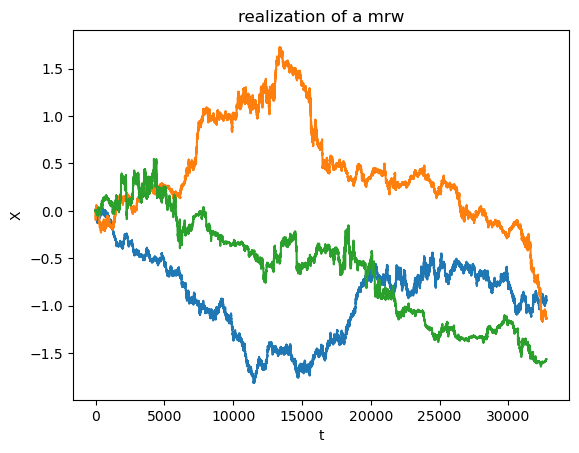

In [4]:
X = [mrw(shape=2**15, H=0.5, lam=lam, L=2**15) for lam in [0.1, 0.2, 0.3]]

for idx,lam in enumerate([0.1, 0.2, 0.3]):
    plt.plot(X[idx])
plt.title('realization of a mrw')
plt.ylabel('X')
plt.xlabel('t')
plt.show()

## Power Spectral Density

Power spectral density analysis is done with the `psd` module

The sampling frequency `fs` is necessary in order to correctly label the frequency axis

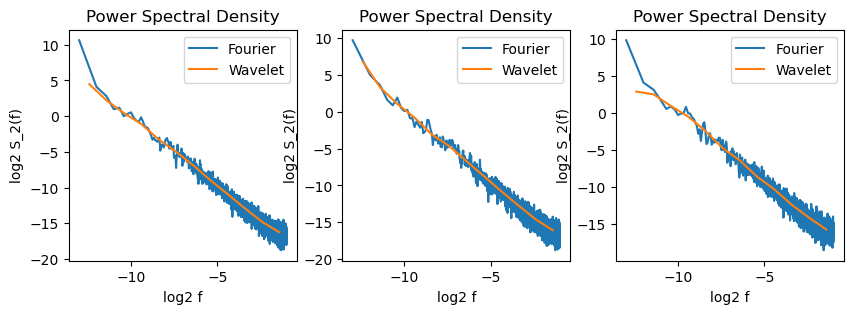

In [5]:
import pymultifracs.psd as psd
fs  = 1
plt.figure(figsize=(10,3))
for k in range(3):
    plt.subplot(1,3,k+1)
    psd.plot_psd(X[k], fs, n_fft=2**13)


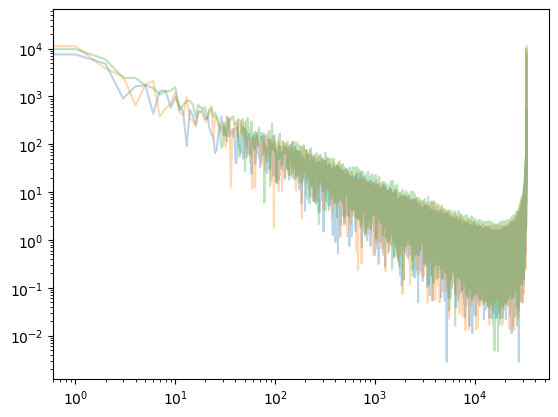

In [6]:
for k in range(3):
    X_hat = np.fft.fft(X[k])
    plt.loglog(np.abs(X_hat), alpha=0.3)
plt.show()

The wavelet-based estimation of the PSD is obtained via the `wavelet_estimation` function

In [7]:
from pymultifracs.mfa import mf_analysis_full
from pymultifracs.utils import build_q_log


/Users/gsaes/Projets/pymultifracs/examples/../pymultifracs/mfspectrum.py:244: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(self.hq[:, scaling_range, 0], self.Dq[:, scaling_range, 0],


Text(0.5, 0.98, 'Multifractal Spectrum')

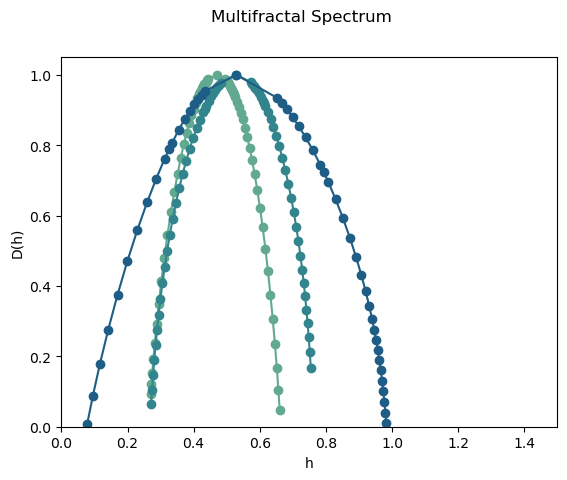

In [8]:
palette = sns.color_palette('crest', n_colors=3)
mf = [mf_analysis_full(x, scaling_ranges=[[5,10]], gamint=0.0, p_exp=np.inf, q=build_q_log(1, 15, 30))[1].spectrum for x in X]
for i, m in enumerate(mf):
    m.plot(color=palette[i])
plt.title('')
plt.suptitle('Multifractal Spectrum')

In [9]:
def plot_coef(mrq, j1, j2, leader=True):
    
    if leader:
        vmax = max([np.nanmax(mrq[s]) for s in range(j1, j2+1)])
        vmin = 0
    else:
        vmin, vmax = None, None
        
    plt.figure(figsize=(20, 7))

    for i, scale in enumerate(range(j1, j2 + 1)):

        temp = mrq[scale][~np.isnan(mrq[scale])]
        
        X = (np.arange(temp.shape[0] + 1) + (3 if leader else 2)) * (2 ** (scale - j1 + 1))
        X = np.tile(X[:, None], (1, 2))

        C = temp[:, None]
        
        Y = np.ones(X.shape[0]) * scale
        Y = np.stack([Y - .5, Y + .5]).transpose()
        
        qm = plt.pcolormesh(X, Y, C, vmin=vmin, vmax=vmax, cmap='flare_r')

    plt.colorbar(qm)

In [11]:
from pymultifracs.wavelet import wavelet_analysis

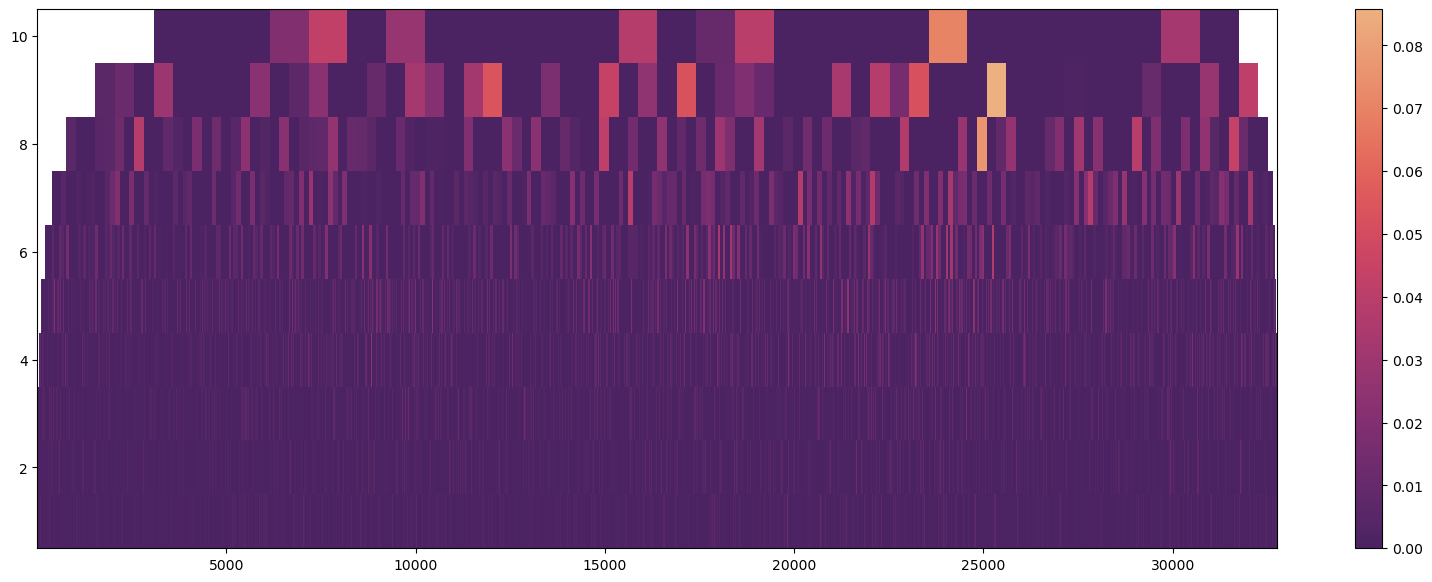

In [18]:
WT = wavelet_analysis(X[0], p_exp=np.inf, j1=5, j2=10, weighted=True, gamint=0)
plot_coef(WT.wt_coefs.values, 1, 10, True)

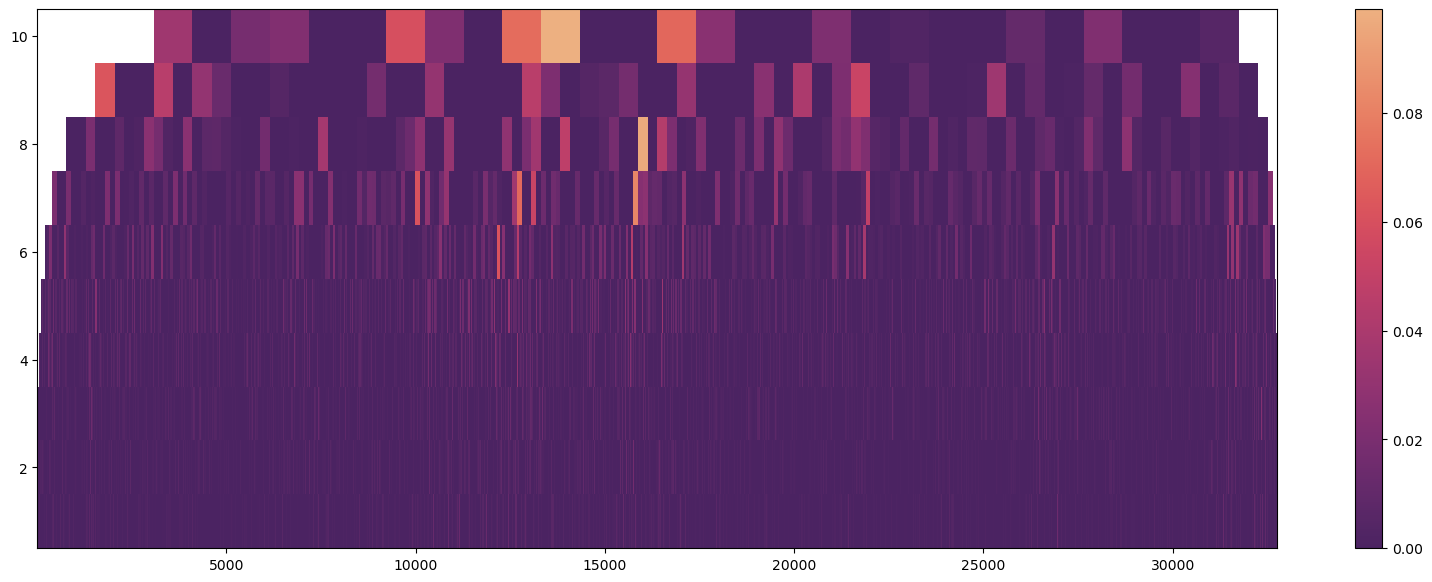

In [19]:
WT = wavelet_analysis(X[1], p_exp=np.inf, j1=5, j2=10, weighted=True, gamint=0)
plot_coef(WT.wt_coefs.values, 1, 10, True)